# Pytorch

In [1]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST' 
fmnist = datasets.FashionMNIST(data_folder, download=True, \
                               train=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 14781330.17it/s]


Extracting /Users/maukanmir/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/maukanmir/data/FMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276407.45it/s]


Extracting /Users/maukanmir/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/maukanmir/data/FMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 524788.75it/s]


Extracting /Users/maukanmir/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/maukanmir/data/FMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9959537.36it/s]

Extracting /Users/maukanmir/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/maukanmir/data/FMNIST/FashionMNIST/raw



In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY \
-{tr_targets.shape}\n\tY-Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}') 

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y-Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

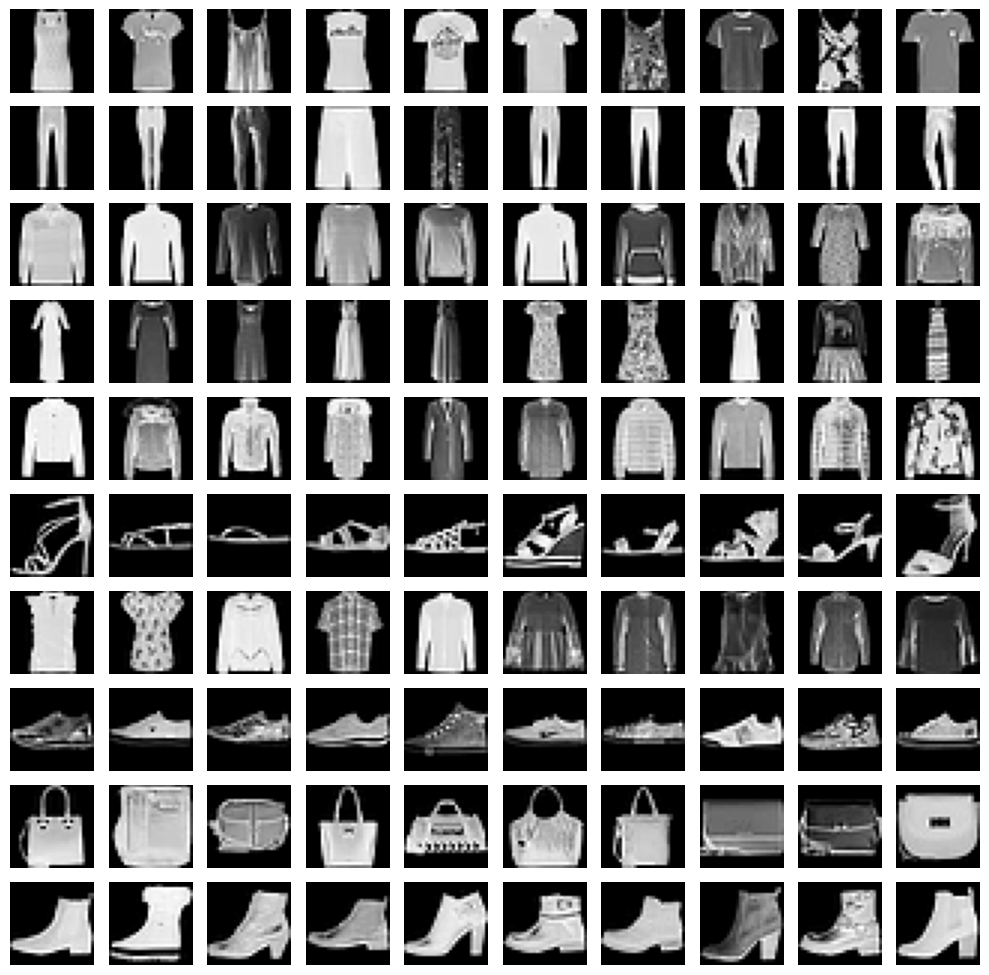

In [8]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
            plot_cell.grid(False); plot_cell.axis('off')
            ix = np.random.choice(label_x_rows)
            x, y = tr_images[ix], tr_targets[ix]
            plot_cell.imshow(x, cmap='gray')
    plt.tight_layout()

In [9]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision import datasets
data_folder = '~/data/FMNIST' # This can be any directory you 
# want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, \
                                                  train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [10]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

### Note that in the __init__ method, we have converted the input into a floating-point number and have also flattened each image into 28*28 = 784 numeric values (where each numeric value corresponds to a pixel value). We are also specifying the number of data points in the __len__ method; here, it is the length of x. The __getitem__ method contains logic for what should be returned when we ask for thee ixth data points (ix will be an integer between 0 and __len__).

